# Gradient Boosting

The principle behind boosting algorithms is that first we build a model on the training dataset, then a second model is built to rectify the errors present in the first model. This procedure is continued untill and unless the errors are minimized, and the dataset is predicted correctly. In particular we start with a weak model andn subsequently, each new model is fit on a modified version of the oiginal dataset.

**Notes:**
- A weak learner is a model that performs at least slightly better than a random model.
- Decision trees are generally used as weak learners in gradient boosting.
- Unlike AdaBoost, where decision trees with only one level (`max_depth` = 1) (decision stumps) are used, the decision trees used in Gradient Boost generally contains some $3$-$7$ levels.

**Steps:**
In this notebook, we implement Gradient Boosting algorithm and show how it works for regression. Following are the steps involved:
1. Make a first guess for `y_train` and `y_test`, using the average of `y_train`.
$$y_{\text{train}_{p^0}} = \frac{1}{n} \sum_{i=1}^{n} y_{\text{train}_i}$$
$$y_{\text{test}_{p^0}} = y_{\text{train}_{p^0}}$$
2. Calculate the residuals from the training dataset.
$$r_0 = y_{\text{train}} - y_{\text{train}_{p^0}}$$
3. Fit a weak learner to the residuals minimizing the loss function. Let's call it $f_0$.
$$r_0 = f_0(X_{\text{train}})$$
4. Increment the predicted $y$'s.
$$y_{\text{train}_{p^1}} = y_{\text{train}_{p^0}} + \alpha f_0(X_{\text{train}})$$
$$y_{\text{test}_{p^1}} = y_{\text{test}_{p^0}} + \alpha f_0(X_{\text{test}})$$
where $\alpha$ is the learning rate.

5. Repeat steps 2. through 4. until you reach the required no. of boosting rounds.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We will need to run several iterations, so let's create a function to imlement GradBoost.

In [2]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate:float = 0.1):
    # make a first guess of our training target variable using the mean of y_train
    y_train_hat = np.repeat(np.mean(y_train), len(y_train))

    # initiazlize the test predictions with the mean of the training target variables
    y_test_hat = np.repeat(np.mean(y_train), len(X_test))

    # calculate the residuals from the training data using the first guess
    residuals = y_train - y_train_hat

    # iterates through the boosting rounds-
    for i in range(boosting_rounds):
        # fit the model on the residuals
        model = model.fit(X_train, residuals)

        # increment the predicted training 'y' with the (pseudo residuals * learning rate)
        y_train_hat += learning_rate * model.predict(X_train)

        # increment the predicted test 'y' as well
        y_test_hat += learning_rate * model.predict(X_test)

        # calculate the residuals for the next round
        residuals = y_train - y_train_hat
    
    return y_train_hat, y_test_hat

We will create a synthetic dataset on which we will apply Gradient Boosting.

In [3]:
from sklearn.datasets import make_regression

X,y = make_regression(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_targets=1,
    bias=0.0,
    noise=20,
    shuffle=True,
    random_state=69
)

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

The weak learner that we will use is Decision Tree Regressor with a depth of $3$. We can also use other regressors such as linear regressor, Ridge Regressor, Lasso Regressor etc.

In [4]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3
)

Let's see how the squared error reduces as we keep increasing the no. of boosting rounds.

We will store the errors in a list, and will plot further.

In [5]:
mse_train = []
n_rounds = np.arange(5,101,5)
for n_round in n_rounds:
    y_train_hat,_ = GradBoost(
        model,
        X_train,
        y_train,
        X_test,
        boosting_rounds=n_round,
        learning_rate=0.1
    )

    print("round #", n_round)

    mse_train.append(np.mean((y_train-y_train_hat)**2))

round # 5
round # 10
round # 15
round # 20
round # 25
round # 30
round # 35
round # 40
round # 45
round # 50
round # 55
round # 60
round # 65
round # 70
round # 75
round # 80
round # 85
round # 90
round # 95
round # 100


Let's plot the reduction in training error w.r.t. the no. of boosting rounds (We can do the same for test error as well).

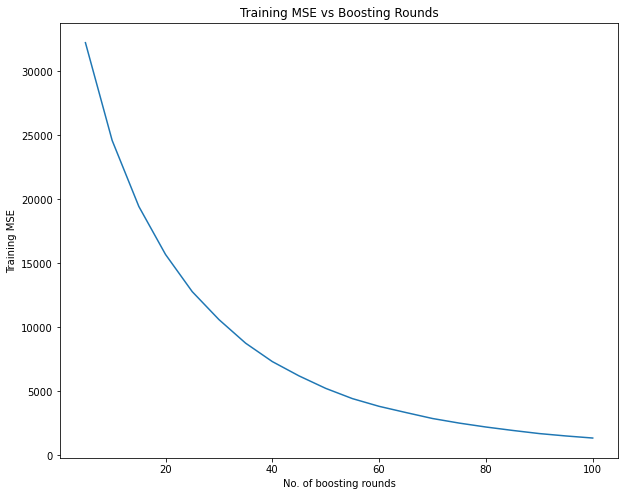

In [8]:
plt.figure(figsize=(10,8))
plt.plot(n_rounds, mse_train)
plt.title("Training MSE vs Boosting Rounds")
plt.xlabel("No. of boosting rounds")
plt.ylabel("Training MSE")
plt.show()

## Comparing predicted targets with actual labels (based on no. of boosts)

We can also compare the actual target values with the predicte values for a given boosting round value.

### boosting_rounds = 0

Initially, we consider the mean of y_train values as the prediction. Let's plot this.

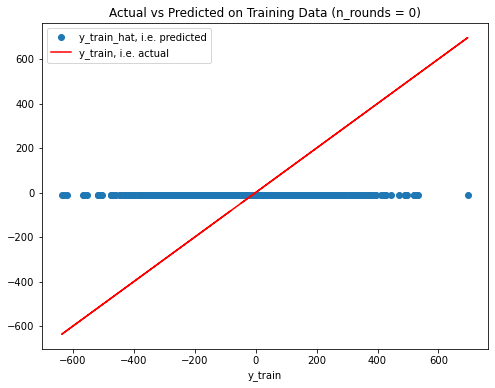

In [9]:
plt.figure(figsize=(8,6))

n_rounds = 0

y_train_hat,_ = GradBoost(
    model,
    X_train,
    y_train,
    X_test,
    boosting_rounds=n_rounds,
    learning_rate=0.1
)

plt.scatter(y_train, y_train_hat, label="y_train_hat, i.e. predicted")
plt.plot(y_train, y_train, color='r', label="y_train, i.e. actual")
plt.title("Actual vs Predicted on Training Data (n_rounds = " + str(n_rounds) + ")")
plt.xlabel("y_train")
plt.legend()
plt.show()

Similarly, we can also plot for `y_test` and `y_test_hat` as well.

### boosting_rounds = 10

We can see how the prediction gets better as the no. of boosting rounds is increased to $10$.

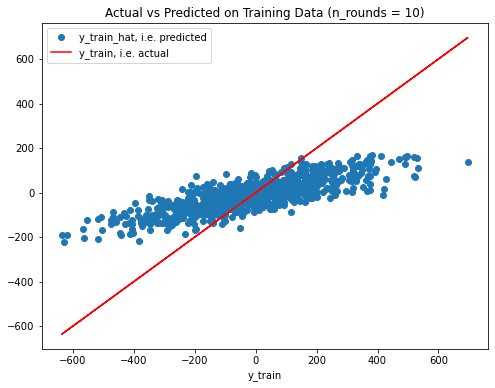

In [10]:
plt.figure(figsize=(8,6))

n_rounds = 10

y_train_hat,_ = GradBoost(
    model,
    X_train,
    y_train,
    X_test,
    boosting_rounds=n_rounds,
    learning_rate=0.1
)

plt.scatter(y_train, y_train_hat, label="y_train_hat, i.e. predicted")
plt.plot(y_train, y_train, color='r', label="y_train, i.e. actual")
plt.title("Actual vs Predicted on Training Data (n_rounds = " + str(n_rounds) + ")")
plt.xlabel("y_train")
plt.legend()
plt.show()

### boosting_rounds = 100

We can see how the prediction gets better as the no. of boosting rounds is increased to $100$.

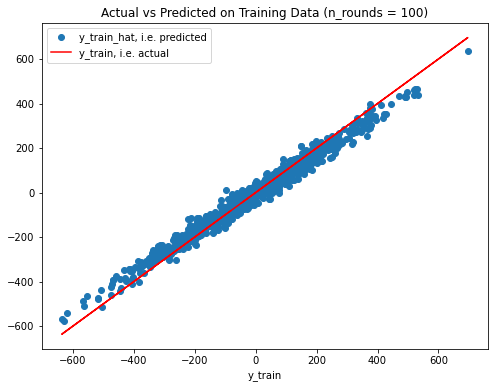

In [11]:
plt.figure(figsize=(8,6))

n_rounds = 100

y_train_hat,_ = GradBoost(
    model,
    X_train,
    y_train,
    X_test,
    boosting_rounds=n_rounds,
    learning_rate=0.1
)

plt.scatter(y_train, y_train_hat, label="y_train_hat, i.e. predicted")
plt.plot(y_train, y_train, color='r', label="y_train, i.e. actual")
plt.title("Actual vs Predicted on Training Data (n_rounds = " + str(n_rounds) + ")")
plt.xlabel("y_train")
plt.legend()
plt.show()

### boosting_rounds = 500

We can see how the prediction gets better as the no. of boosting rounds is increased to $500$.

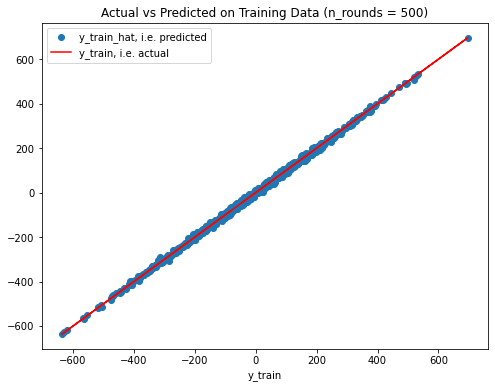

In [12]:
plt.figure(figsize=(8,6))

n_rounds = 500

y_train_hat,_ = GradBoost(
    model,
    X_train,
    y_train,
    X_test,
    boosting_rounds=n_rounds,
    learning_rate=0.1
)

plt.scatter(y_train, y_train_hat, label="y_train_hat, i.e. predicted")
plt.plot(y_train, y_train, color='r', label="y_train, i.e. actual")
plt.title("Actual vs Predicted on Training Data (n_rounds = " + str(n_rounds) + ")")
plt.xlabel("y_train")
plt.legend()
plt.show()